## Цель работы

Целью работы являлось обучение модели с архитектурой YOLO для детекции горящей и потухшей свечи. Данная модель может быть полезна для разработок систем умного дома и сможет предупреждать человека погасить все горящие свечи перед уходом на улицу. Например, человеку может приходить сообщение на телефон или гореть световой индикатор рядом с входной дверью. Это в свою очередь сможет повысить пожаробезопасность жилища и качество жизни человека.

## Модули

In [1]:
import yaml
from ultralytics import YOLO
from IPython.display import Image

## Обучение модели

Подготовка .yaml файла с описанием датасета.

In [2]:
dataset = {
    "train": "../dataset/train/images",
    "val": "../dataset/valid/images",
    "nc": 2,
    "names": ["BurnedCandle", "Candle"]
}

with open("./dataset.yaml", "w") as file:
    yaml.dump(dataset, file, default_flow_style=False)

Набор аугментаций для обучающих данных.

In [3]:
augmentations = {
    "degrees": 10,
    "translate": 0.1,
    "scale": 0.5,
    "shear": 10,
    "fliplr": 0.5,
    "mosaic": 0.5,
    "erasing": 0.3,
    "hsv_h": 0.01,
    "hsv_s": 0.3,
    "hsv_v": 0.3,
}

Обучение модели.

In [4]:
TRAIN_YOLO = False
if TRAIN_YOLO:
    model = YOLO("yolov8n.pt")
    train_results = model.train(
        data="./dataset.yaml",
        epochs=1000,
        patience=1000,
        save_period=-1,
        batch=16,
        imgsz=640,
        device="cuda",
        optimizer="Adam",
        lr0=0.001,
        freeze=10,
        project="./runs",
        name="yolov8n_candle_detection",
        exist_ok=True,
        augment=True,
        **augmentations,
    )

Отобразим историю обучения модели.

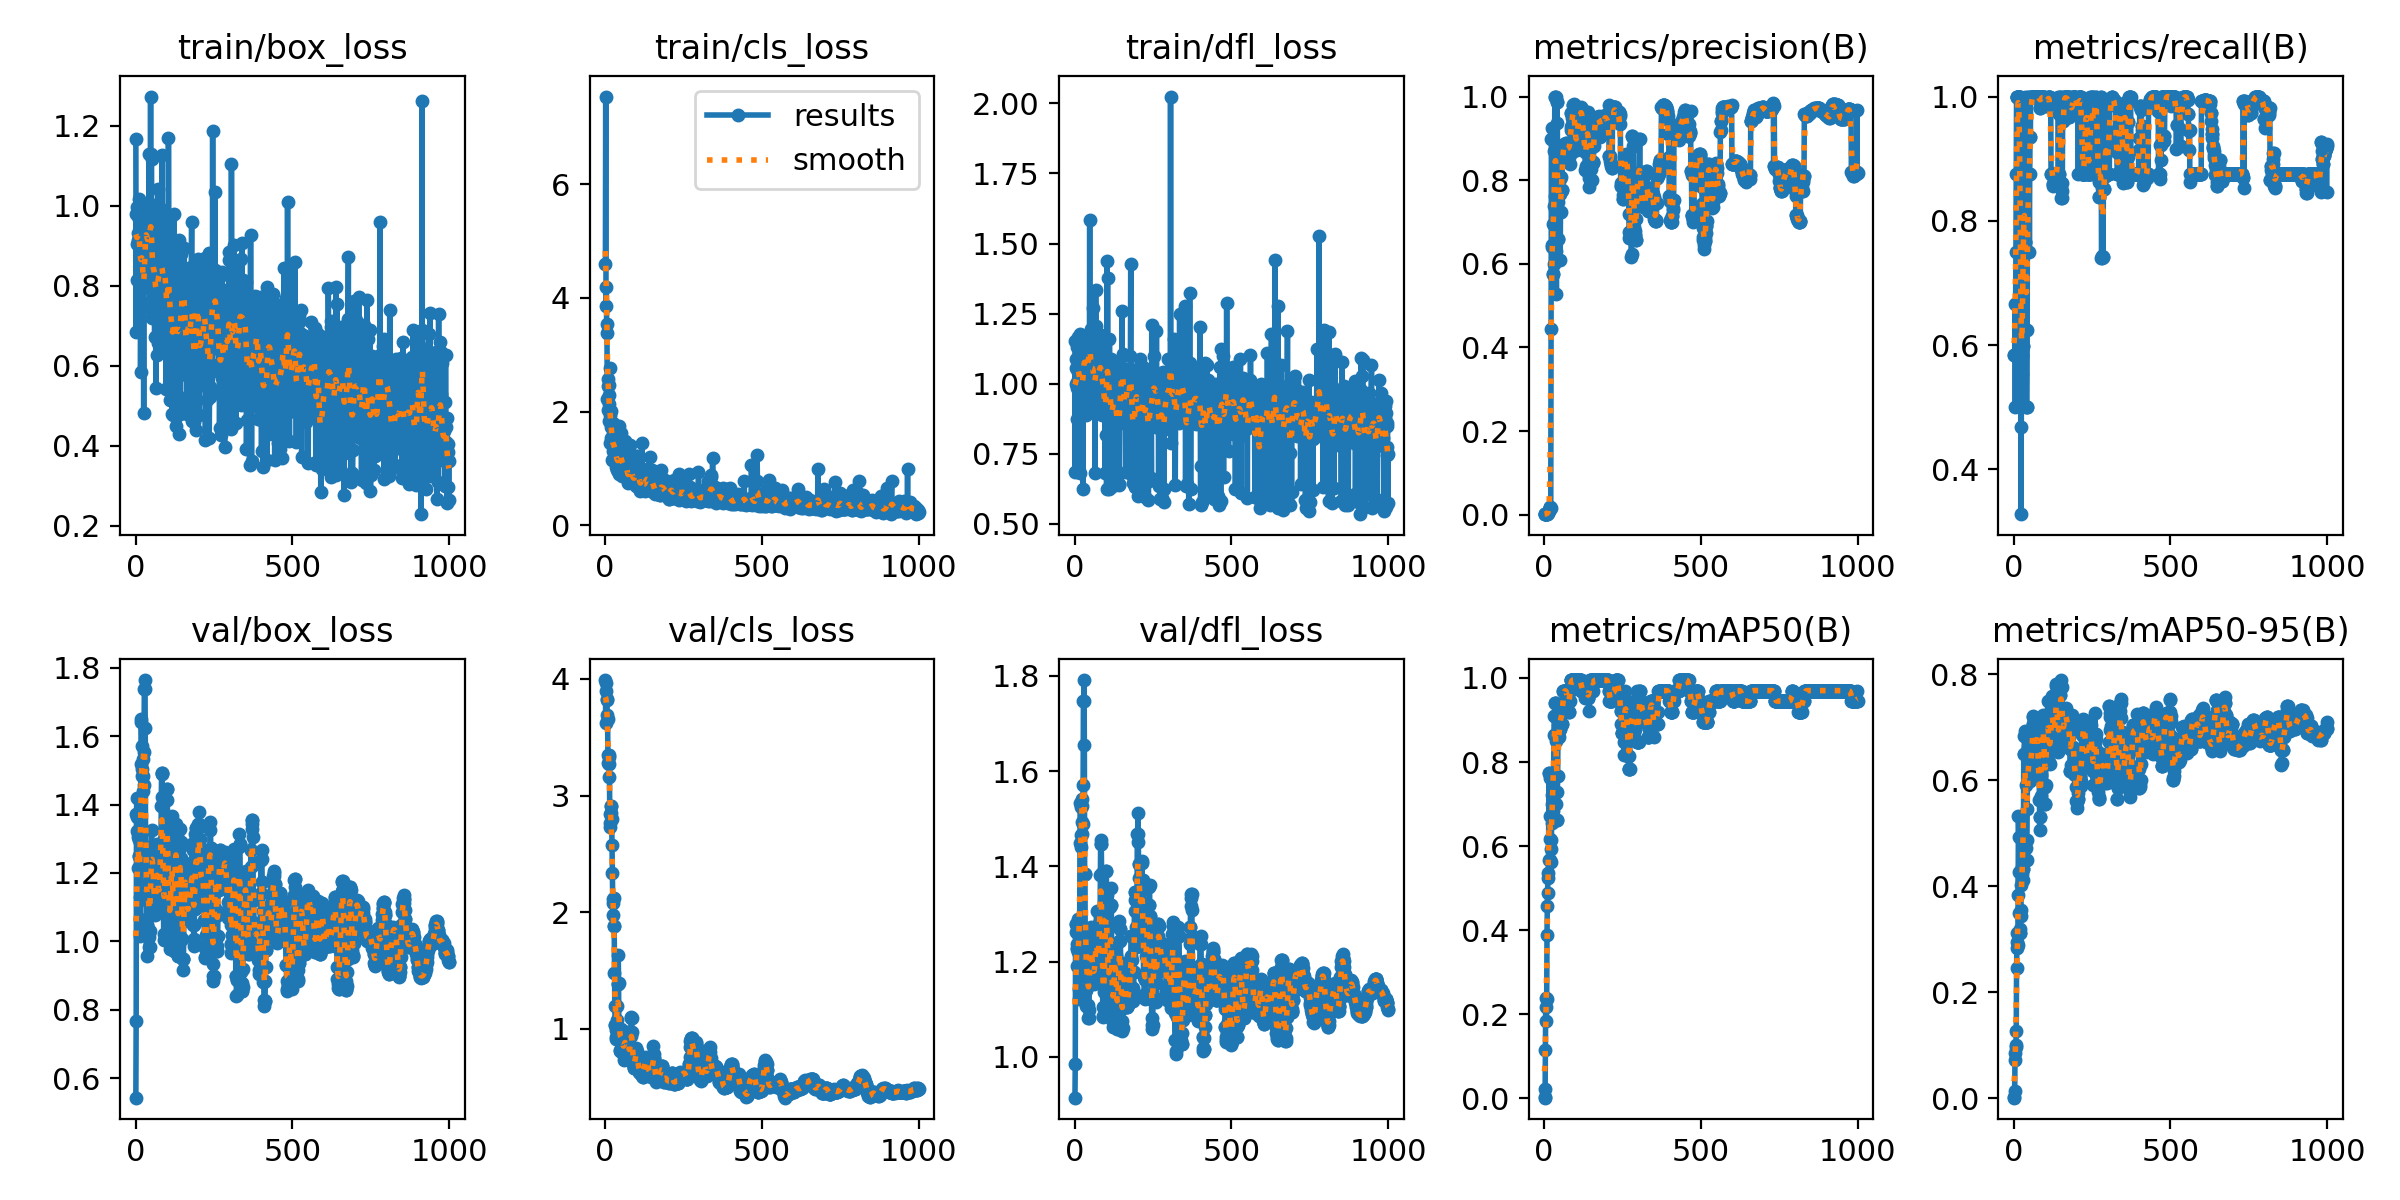

In [5]:
Image(r".\runs\yolov8n_candle_detection\results.png")

Можно видеть, что процесс обучения происходит стабильно (без заметных выбросов), наблюдается снижение величины функции потерь и увеличение метрик классификации.

## Метрики лучшей модели

Загрузим лучшую модель и проверим метрики на валидационном наборе данных.

In [6]:
model = YOLO(r".\runs\yolov8n_candle_detection\weights\best.pt")
val_results = model.val(
    data="./dataset.yaml",
    imgsz=640,
    batch=16,
    augment=False,
    project="./runs/vals",
    name="yolov8n_candle_detection",
    exist_ok=True,
)

Ultralytics YOLOv8.2.78  Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\ivana\CVSkillBox\3. CVForRobotics\module_7\module7_practice\dataset\valid\labels.cache... 14 images, 4 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]


                   all         14         10      0.879      0.852      0.995      0.789
          BurnedCandle          6          6      0.758          1      0.995       0.82
                Candle          4          4          1      0.704      0.995      0.759
Speed: 3.9ms preprocess, 28.7ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to runs\vals\yolov8n_candle_detection


Отобразим матрицу ошибок модели на валидационном наборе данных.

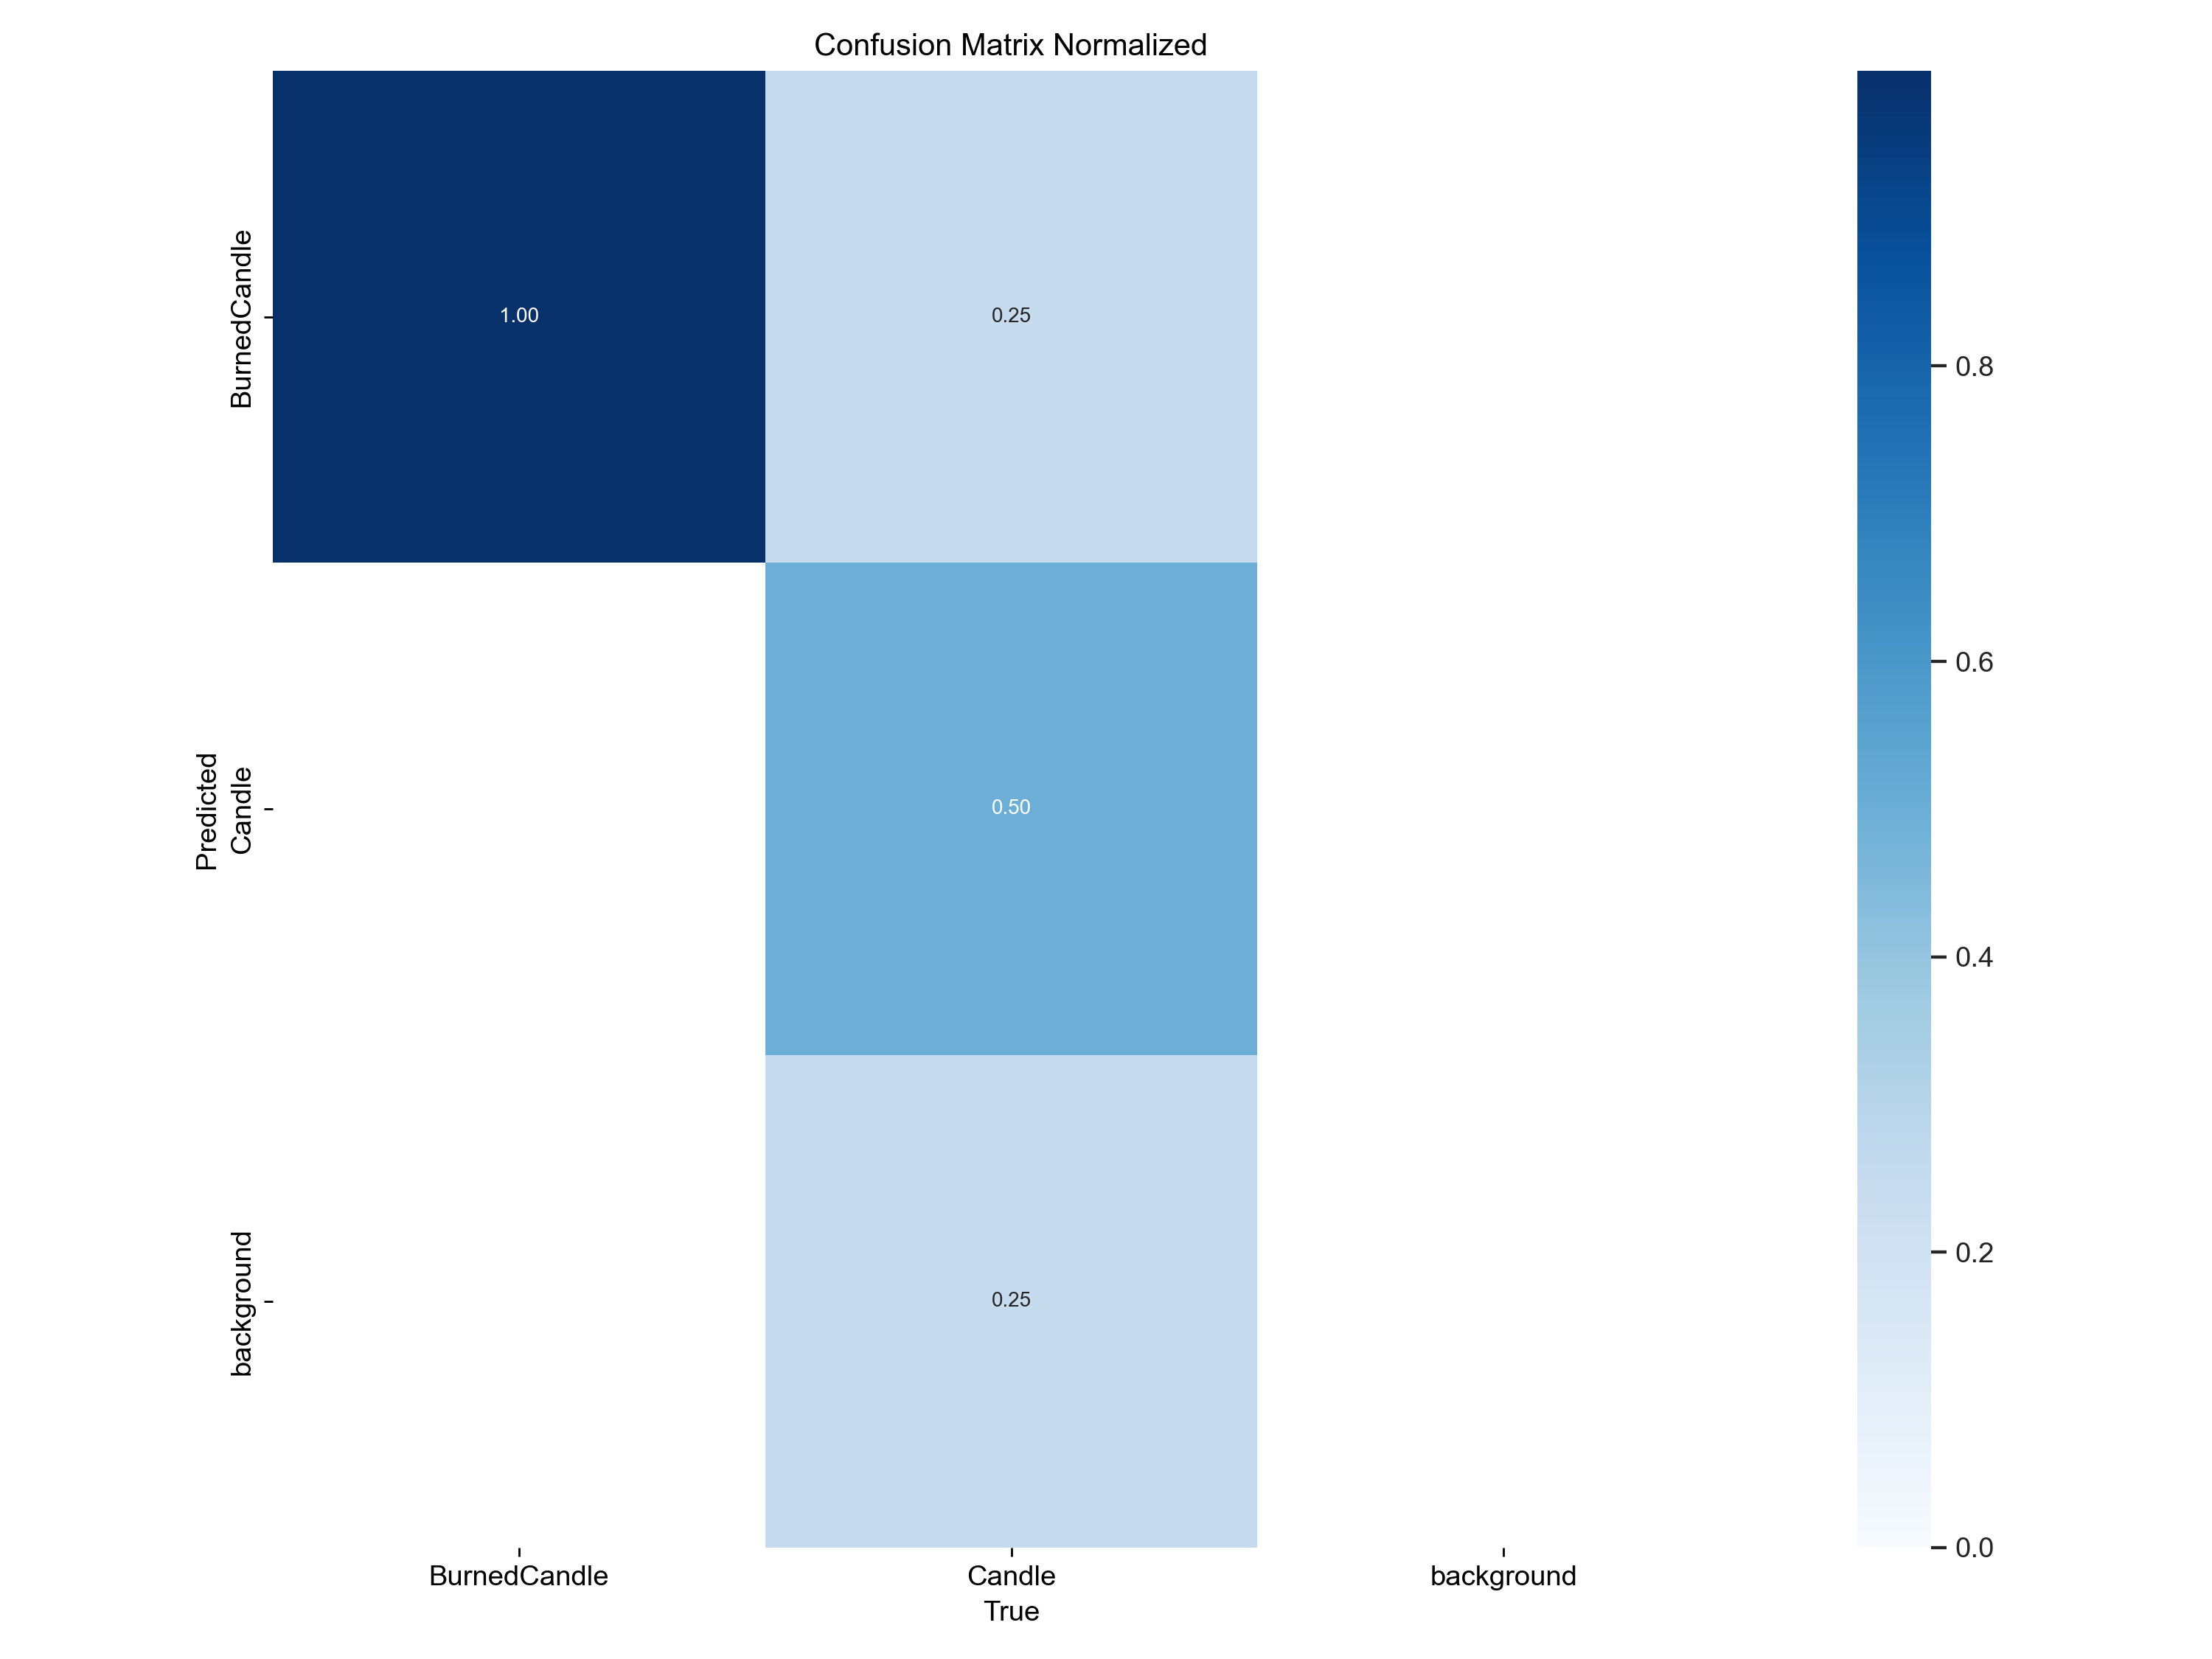

In [7]:
Image(r".\runs\vals\yolov8n_candle_detection\confusion_matrix_normalized.png", width=1000)

Из матрицы ошибок видно, что наибольшая точность детектирования достигается для горящей свечи, что соответствует цели работы. Потухшая же свеча может детектироваться как горящая или как фон. Можно сказать, что модель склонна к ложноположительным срабатываниям.

Отобразим примеры детектирования объектов в валидационном наборе данных.

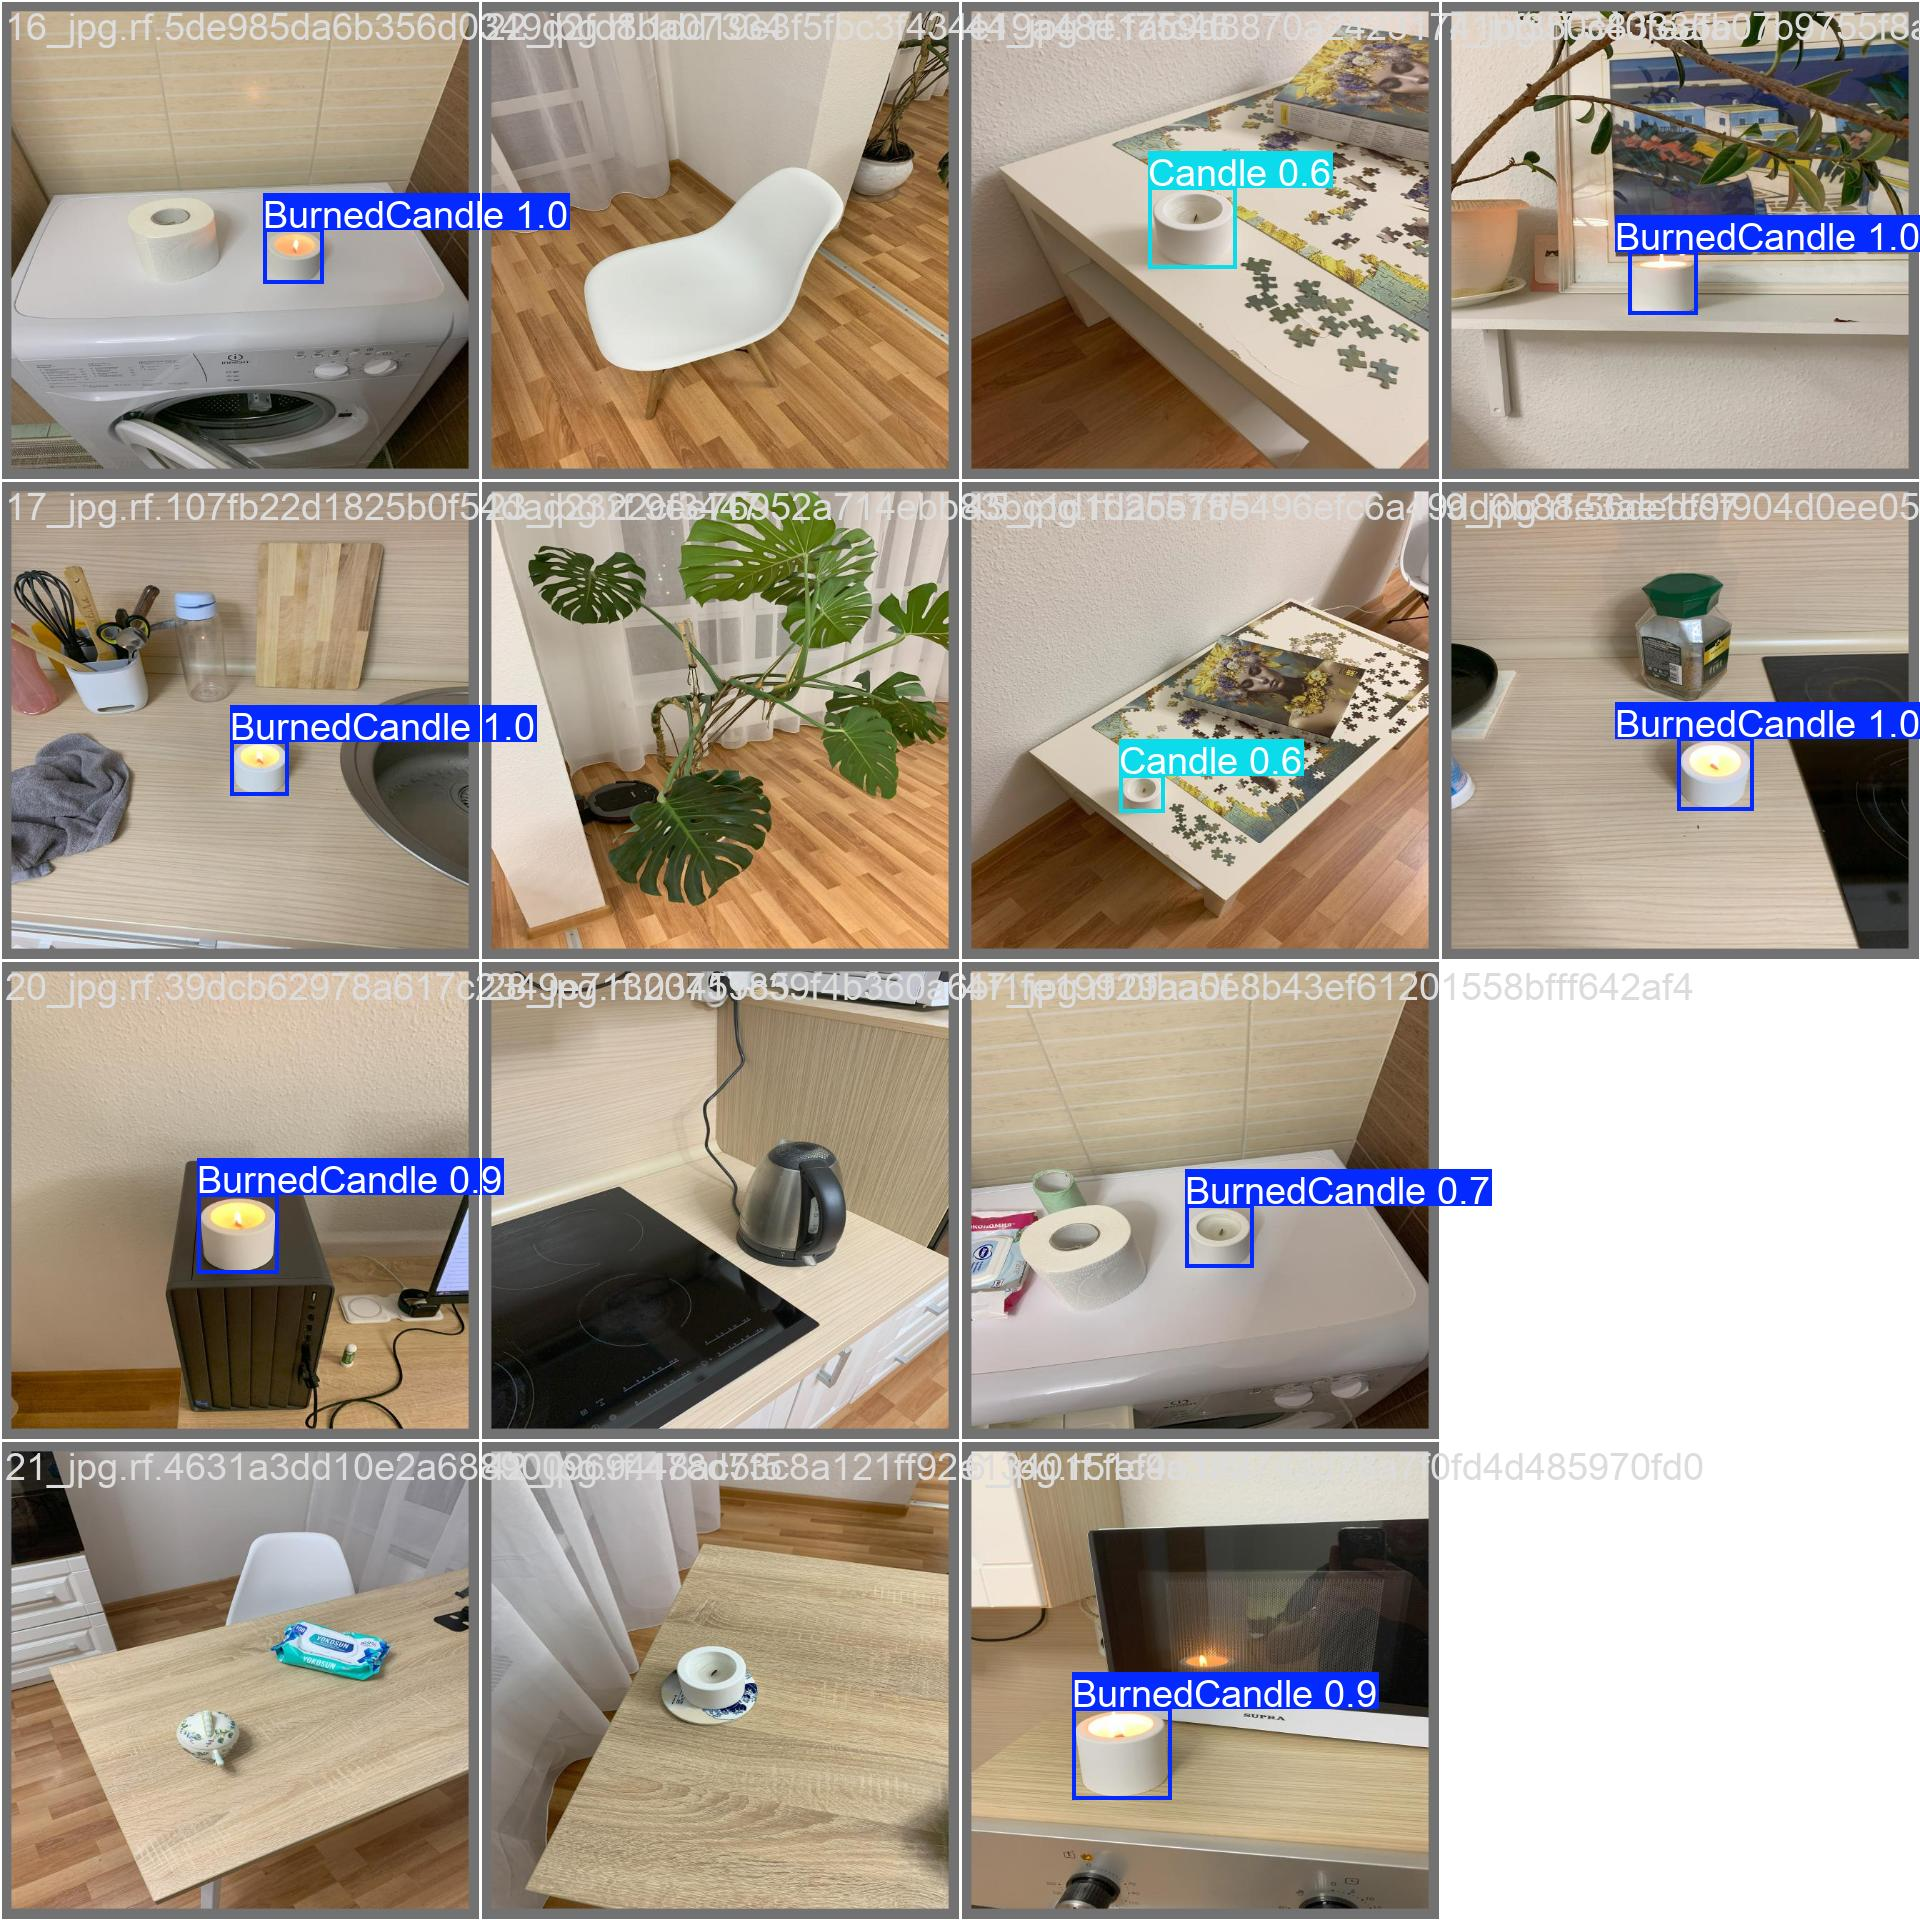

In [8]:
Image(r".\runs\vals\yolov8n_candle_detection\val_batch0_pred.jpg", width=1000)

Примеры на рисунке полностью соответствуют полученной ранее матрице ошибок - наблюдается достаточно точное детектирование горящей свечи и менее точное потухшей.

## Выводы

В работе собран и размечен набор данных, обучена модель детекции с архитектурой YOLOv8 для обнаружения горящей и потухшей свечи. Показано, что модель способна с высокой точностью детектировать горящую свечу и с меньшей точностью детектировать потухшую, что соответствует цели работы.